## Getting started with Fermat
 
This notebook introduces the basic concepts in order to compute Fermat distance using the Fermat package.

We use a toy data set (the swiss roll) in order to illustrate. 

 **Contents**:
        
    1- Data generation
    2- Computing Fermat distance
    3- Visualization using t-sne
    

In [1]:
import numpy as np
from scipy.spatial import  distance_matrix
from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from generate_data import generate_swiss_roll

from fermat import Fermat

### 1- Data generation

In [2]:
# Generate swiss roll 
data, labels = generate_swiss_roll(oscilations = 15, A = 3, n = 100)
print('Data dimension:{}'.format(data.shape))

Data dimension:(400, 3)


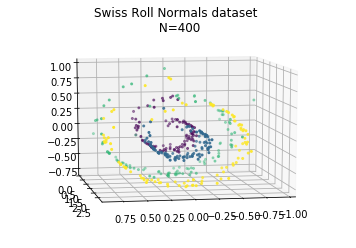

In [3]:
# Visualize the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10, 80)
ax.scatter(xs=data[:,0], ys=data[:,1], zs=data[:,2], c=labels, s=4)
plt.title('Swiss Roll Normals dataset \n N=%s'%(data.shape[0]))
plt.show()

In [4]:
# compute euclidean distances
distances = distance_matrix(data,data)

### 2 -  Computing Fermat-Distances

#### Exact method: computes all the pairwise d-distances in an exact way 


In [5]:
%%time
# Initialize the model
f_exact = Fermat(alpha = 3, path_method='FW') 

# Fit
f_exact.fit(np.matrix(distances))

CPU times: user 81.8 ms, sys: 589 µs, total: 82.4 ms
Wall time: 81.5 ms


#### Aprox method: using landmarks and k-nearest neighbours the pairwise Fermat distance iscomputed approximately. 

In [6]:
%%time
# Parameters
k = 10  #number of nearest neighbours to be considered
landmarks = 10
alpha = 3

# Initialize Fermat model
f_aprox = Fermat(alpha, path_method='L', k=k, landmarks=landmarks) 

# Fit
f_aprox.fit(np.matrix(distances))

CPU times: user 46.9 ms, sys: 1.51 ms, total: 48.4 ms
Wall time: 47.2 ms


#### Explore the computed distances

In [7]:
fermat_dist_aprox = f_aprox.get_distances() # Get all distances

In [8]:
fermat_dist_aprox.shape

(400, 400)

In [9]:
print('Mean distance: {:.3f}'.format(np.mean(fermat_dist_aprox)))

Mean distance: 0.081


In [10]:
fermat_dist_exact = f_exact.get_distances()

### 3 - Visualization

In [11]:
# TSNE visualization for the aprox distances
tsne_model = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=1000)
tsnes = tsne_model.fit_transform(fermat_dist_aprox)


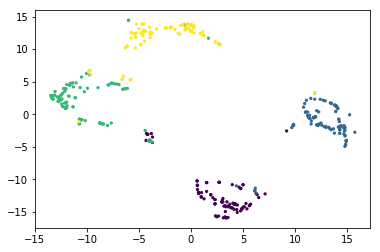

In [12]:
plt.scatter(tsnes[:,0],tsnes[:,1], c = labels, s = 5)